# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | khanu woralaksaburi
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | henderson
Processing Record 5 of Set 1 | kourou
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | qapqal
City not found. Skipping...
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | chul'man
Processing Record 12 of Set 1 | udachny
Processing Record 13 of Set 1 | pagar alam
Processing Record 14 of Set 1 | takanabe
Processing Record 15 of Set 1 | xiulin
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | laminusa
Processing Record 18 of Set 1 | fort bragg
Processing Record 19 of Set 1 | isla vista
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | broome
Processing Record 22 of Set 1 | kalmunai
Processi

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,10.27,82,88,4.50,CL,1707283614
1,khanu woralaksaburi,16.0617,99.8606,34.41,19,0,0.73,TH,1707283614
2,bethel,41.3712,-73.4140,0.02,74,0,0.00,US,1707283615
3,henderson,36.0397,-114.9819,9.43,63,100,6.69,US,1707283615
4,kourou,5.1552,-52.6478,26.03,92,18,3.36,GF,1707283615


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,10.27,82,88,4.50,CL,1707283614
1,khanu woralaksaburi,16.0617,99.8606,34.41,19,0,0.73,TH,1707283614
2,bethel,41.3712,-73.4140,0.02,74,0,0.00,US,1707283615
3,henderson,36.0397,-114.9819,9.43,63,100,6.69,US,1707283615
4,kourou,5.1552,-52.6478,26.03,92,18,3.36,GF,1707283615


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

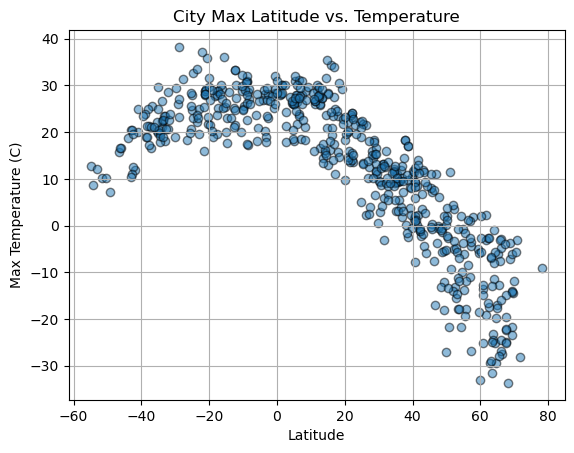

In [39]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha = 0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

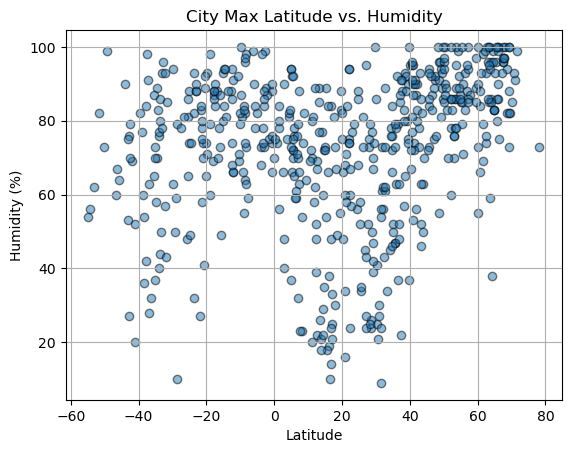

In [41]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha = 0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

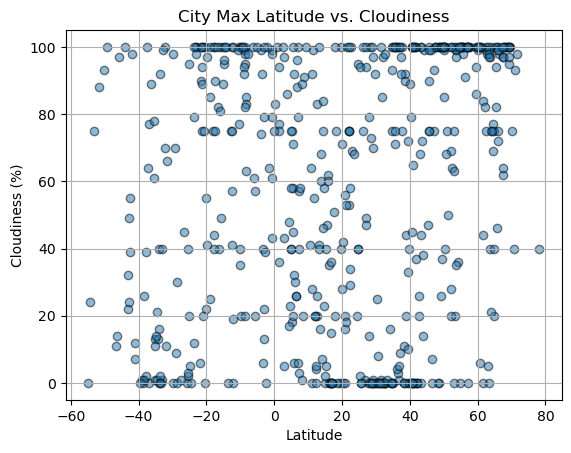

In [42]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha = 0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

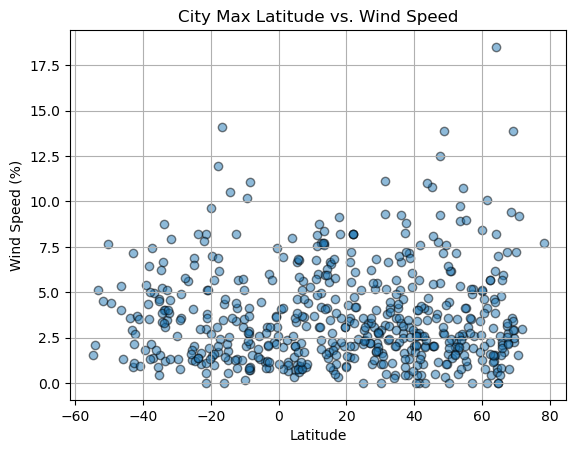

In [43]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha = 0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [106]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, xlabel='', ylabel=''):
    # Calculate linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.text(0.5, 0.9, line_eq, fontsize=12, ha='center', transform=plt.gca().transAxes, color='red')

    regress_values = x * slope + intercept

    # Plot scatter plot
    plt.scatter(x, y)

    # Plot regression line
    plt.plot(x, slope*x + intercept, color='red')


    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # print the r value
    print(f'The r-value is: {r_value**2}')
    # Show plot
    plt.show()

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,khanu woralaksaburi,16.0617,99.8606,34.41,19,0,0.73,TH,1707283614
2,bethel,41.3712,-73.4140,0.02,74,0,0.00,US,1707283615
3,henderson,36.0397,-114.9819,9.43,63,100,6.69,US,1707283615
4,kourou,5.1552,-52.6478,26.03,92,18,3.36,GF,1707283615
5,tiksi,71.6872,128.8694,-28.08,99,98,2.97,RU,1707283616


In [52]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,10.27,82,88,4.50,CL,1707283614
7,blackmans bay,-43.0167,147.3167,20.41,53,22,0.89,AU,1707283616
8,ushuaia,-54.8000,-68.3000,12.81,54,0,1.54,AR,1707283617
11,pagar alam,-4.0167,103.2667,26.81,73,99,1.17,ID,1707283618
14,grytviken,-54.2811,-36.5092,8.65,56,24,2.07,GS,1707283619


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8009006048026125


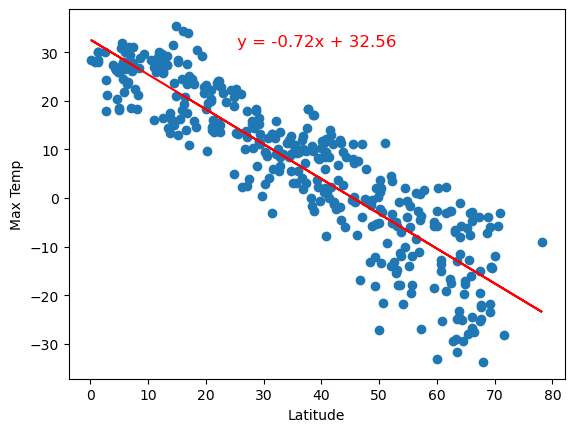

In [107]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

The r-value is: 0.31563688360597403


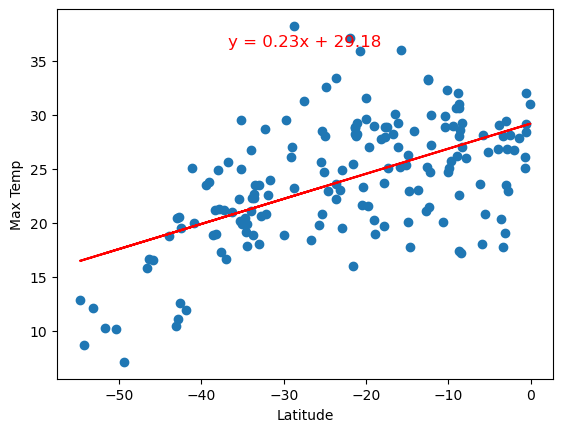

In [108]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** The r-value in the Northern Hemisphere (0.8009006048026125) points that Latitude and Max Temp has a strong correlation, while there is weak correlation between Latitude and Max temp in the Southern Hemisphere (0.31563688360597403).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.23309947084308363


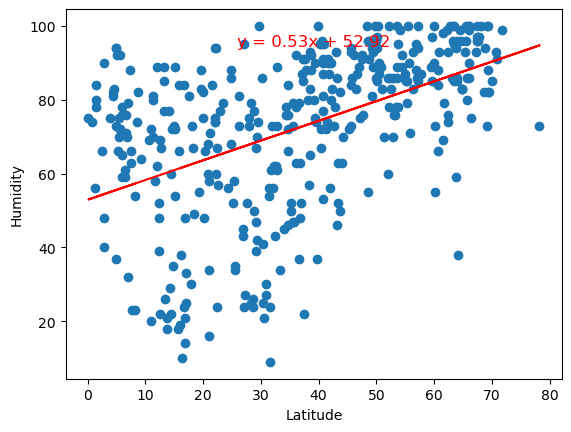

In [109]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity')

The r-value is: 0.11666173179352328


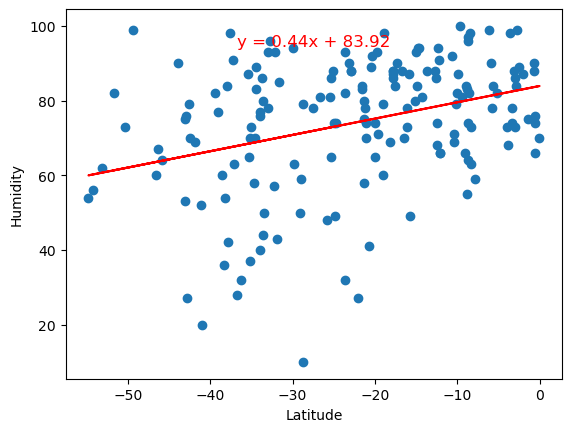

In [110]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity')

**Discussion about the linear relationship:** The r-value for both Northern and Southern Hemisphere suggests that there is weak correlation between Latitude and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10928717564077968


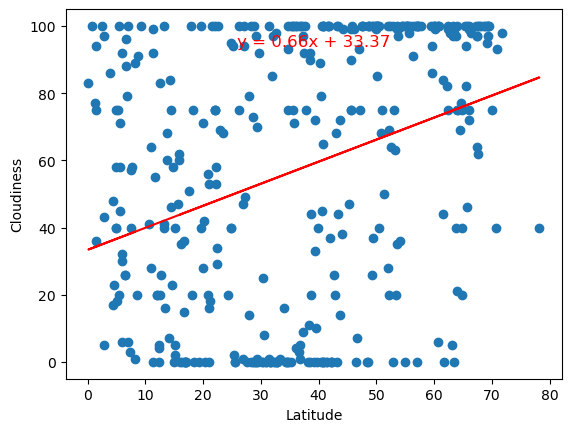

In [112]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

The r-value is: 0.1060732164832082


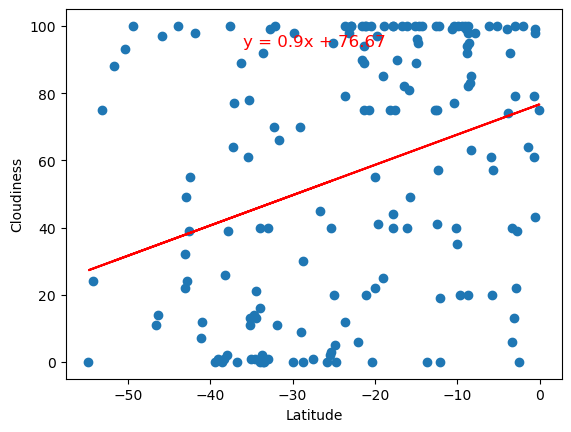

In [113]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** The r-value for both Northern and Southern Hemisphere suggests that there is a very weak correlation between Latitude and Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00622144840562305


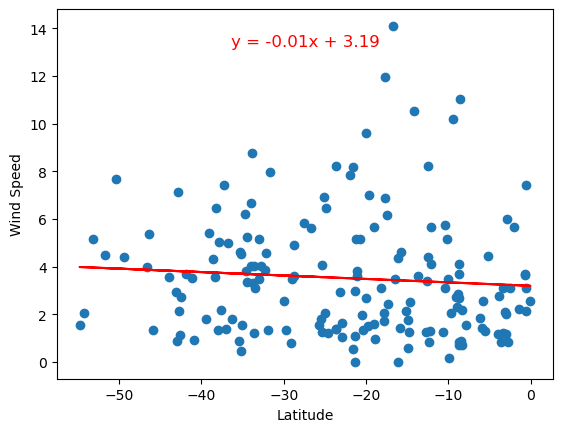

In [116]:
# Northern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

The r-value is: 0.00622144840562305


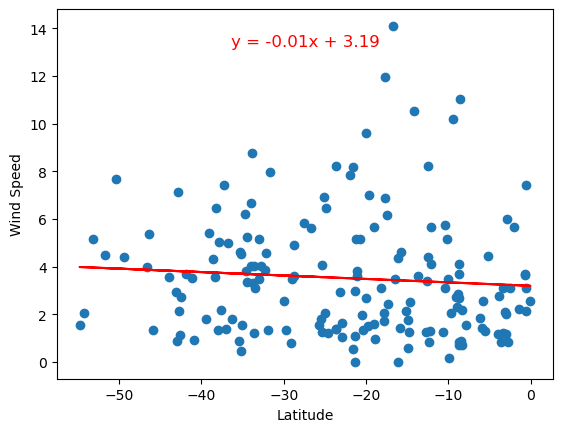

In [117]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** The r-value for both Northern and Southern Hemisphere suggests that there is no correlation between Latitude and Wind Speed.